 Demonstrate data augmentation by principal component analysis (PCA)
 and singular value decomposition (SVD).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
 

 Demo image from sci-kit.

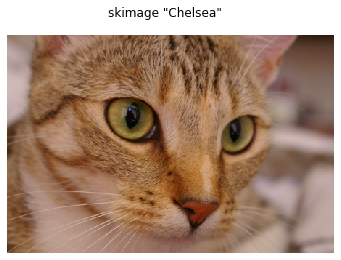

In [2]:
img = data.chelsea()

fig = plt.figure(1)
fig.suptitle('skimage "Chelsea"')
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)
ax.set_aspect(1)
ax.set_axis_off()


 Reshape and zero-mean the RGB matrix of the image.

In [3]:
img_ = img.reshape((img.shape[0]*img.shape[1], 3))
m = img_.mean(axis = 0)
img_ = img_ - m


 Apply SVD and reconstruct with a random Gaussian factor (centre = 1.0, std = 0.5)
 for each SVD component. Seed fixed.

In [4]:
U, S, Vh = np.linalg.svd(img_, full_matrices = False)

np.random.seed(0)
UVh = np.zeros(shape = (img_.shape[0], img_.shape[1], S.shape[0]), dtype = float)
for i in range(3):
    j = np.random.normal(loc = 1.0, scale = 0.5)
    UVh[:, :, i] = j*S[i]*np.dot(np.transpose(np.matrix(U[:, i])), np.matrix(Vh[i, :]))


 SVD components

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


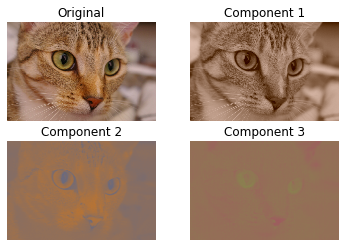

In [5]:
fig, axes = plt.subplots(2, 2)
i = 0
j = np.unravel_index(i, (2, 2))
axes[j].set_title('Original')
axes[j].imshow(img/255.0)
axes[j].set_aspect(1)
axes[j].set_axis_off()

for i in range(3):

    img_temp = S[i]*np.dot(U[:, i, np.newaxis], Vh[i, :][np.newaxis])
    img_temp = img_temp + m
    img_temp = np.reshape(img_temp, newshape = img.shape)

    j = np.unravel_index(i + 1, (2, 2))
    axes[j].set_title('Component %s' % (i + 1))
    axes[j].imshow(img_temp/255.0)
    axes[j].set_aspect(1)
    axes[j].set_axis_off()


 De-zero the mean and reshape to image shape.

In [6]:
img_svd = np.sum(UVh, axis = 2) + m

# img_svd = img_svd + np.min(img_svd, axis = 0)
# mm = np.max(img_svd, axis = 0)
# for i in range(3):
#     img_svd[:, i] = img_svd[:, i] * (1.0/mm[i])

img_svd = np.reshape(img_svd, newshape = img.shape)


 Show difference between original image and the 'augmented' one.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


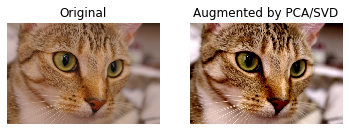

In [7]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(img)

axes[1].set_title('Augmented by PCA/SVD')
axes[1].imshow(img_svd/255.0)

for i in range(2):
    axes[i].set_aspect(1)
    axes[i].set_axis_off()
